In [1]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable


maximize : $169*a+119*b$

st:

$
243*a + 167*b - 60*c - 45*d \le 0 \\
173*a + 158*b - 43*c - 33*d \le 0 \\
216*a + 138*b - 53*c - 43*d \le 0 \\
155*a + 161*b - 43*c - 38*d \le 0 \\
169*a + 157*b - 44*c - 35*d \le 0 \\
51*c + 38*d = 1\\
a,b,c,d >=0
$


In [10]:
model = LpProblem(name="small-problem", sense=LpMaximize)


In [11]:
a = LpVariable(name="a", lowBound=0)
b = LpVariable(name="b", lowBound=0)
c = LpVariable(name="c", lowBound=0)
d = LpVariable(name="d", lowBound=0)

In [12]:
model += 243*a + 167*b - 60*c - 45*d <= 0
model += 173*a + 158*b - 43*c - 33*d <= 0
model += 216*a + 138*b - 53*c - 43*d <= 0
model += 155*a + 161*b - 43*c - 38*d <= 0
model += 169*a + 157*b - 44*c - 35*d <= 0
model += 51*c + 38*d == 1

In [13]:
model+= (169*a + 119*b)

In [14]:
status = model.solve()

In [15]:
status

1

In [88]:
model.objective.value()

0.82543740098

In [89]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

a: 0.0044279646
b: 0.00064799482
c: 0.0
d: 0.026315789


In [91]:
169*0.0044279646  + 119 * 0.00064799482

0.82543740098

In [90]:
for (name, constraint) in model.constraints.items():
    print(f"{constraint}: {constraint.pi}")

243*a + 167*b - 60*c - 45*d <= 0: 0.64348101
173*a + 158*b - 43*c - 33*d <= 0: 0.07302957
216*a + 138*b - 53*c - 43*d <= 0: -0.0
155*a + 161*b - 43*c - 38*d <= 0: -0.0
169*a + 157*b - 44*c - 35*d <= 0: -0.0
51*c + 38*d = 1: 0.8254374


In [84]:
for name, c in model.constraints.items():
    print(f"Shadow price for {name}:", c.pi)

Shadow price for _C1: 0.64348101
Shadow price for _C2: 0.07302957
Shadow price for _C3: -0.0
Shadow price for _C4: -0.0
Shadow price for _C5: -0.0
Shadow price for _C6: 0.8254374


In [87]:
51 - (60*0.6435+43*0.073)

9.250999999999998

In [62]:
import pulp

# Khởi tạo bài toán
prob = pulp.LpProblem("ExampleProblem", pulp.LpMaximize)

# Tạo biến
x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

# Thêm hàm mục tiêu và ràng buộc (ví dụ)
prob += x + y, "Objective Function"
prob += x <= 5, "Constraint1"
prob += y <= 2, "Constraint2"
prob += x - y <=2
# Giải bài toán
prob.solve()

# Lấy danh sách các biến
variables_list = prob.variables()

# In danh sách các biến
for var in variables_list:
    print(var.name)

x
y


In [63]:
for var in prob.variables():
    print(f"{var.name}: {var.value()}")

x: 4.0
y: 2.0


In [64]:
prob.objective.value()

6.0

In [65]:
for (name, constraint) in prob.constraints.items():
    print(f"{constraint}: {constraint.pi}")

x <= 5: -0.0
y <= 2: 2.0
x - y <= 2: 1.0


In [70]:
2+1

3

In [83]:
import pulp

# Khởi tạo bài toán
prob = pulp.LpProblem("DualExample", pulp.LpMaximize)

# Tạo biến
x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

# Thêm hàm mục tiêu
prob += 3*x + 2*y, "Objective Function"

# Thêm ràng buộc
prob += x + 2*y <= 5, "Constraint"

# Giải bài toán
prob.solve()

# In kết quả
print("Optimal value of Z =", pulp.value(prob.objective))
print("x =", x.varValue)
print("y =", y.varValue)

# In shadow price của ràng buộc
print("Shadow price for the constraint:", prob.constraints["Constraint"].pi)

Optimal value of Z = 15.0
x = 5.0
y = 0.0
Shadow price for the constraint: 3.0


In [72]:
prob.constraints["Constraint"].changeUpper(3)

# Giải lại bài toán
prob.solve()

# In kết quả
print("New optimal value of Z after decreasing constraint:", pulp.value(prob.objective))

AttributeError: 'LpConstraint' object has no attribute 'changeUpper'

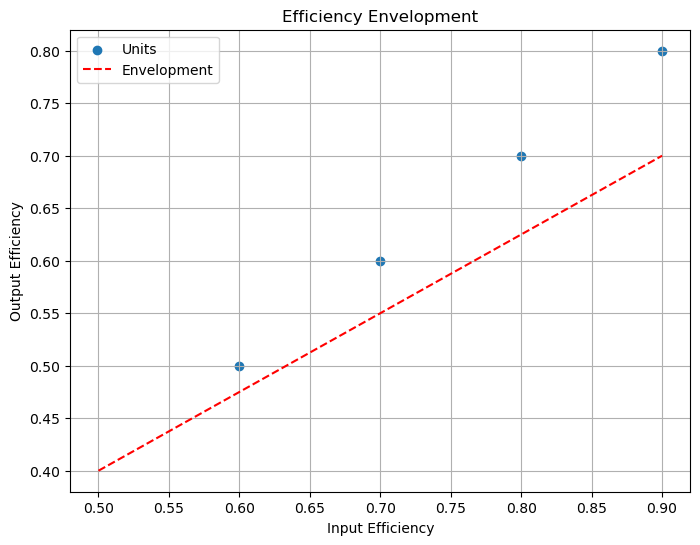

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Giả định dữ liệu hiệu suất (đơn vị đo lường ở đây là chỉ số hiệu suất)
performance_data = {
    'Unit1': [0.8, 0.7],
    'Unit2': [0.6, 0.5],
    'Unit3': [0.7, 0.6],
    'Unit4': [0.9, 0.8],
    # ... thêm dữ liệu cho các đơn vị khác
}

# Tính toán đường envelopment (ở đây chúng ta chỉ minh họa)
# Trong thực tế, bạn cần áp dụng thuật toán DEA để tính toán đường này.
envelopment = np.array([[0.5, 0.4], [0.9, 0.7]])

# Vẽ đường envelopment
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in performance_data.values()], [x[1] for x in performance_data.values()], label='Units')
plt.plot(envelopment[:, 0], envelopment[:, 1], label='Envelopment', color='red', linestyle='--')
plt.title('Efficiency Envelopment')
plt.xlabel('Input Efficiency')
plt.ylabel('Output Efficiency')
plt.legend()
plt.grid(True)
plt.show()